# Import thư viện sử dụng

In [77]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import datetime, time, json
from string import punctuation
from keras.layers import Input
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,GlobalMaxPooling1D,LeakyReLU,Dense, Dropout,Conv1D, SpatialDropout1D,Reshape,Concatenate, BatchNormalization, TimeDistributed, Lambda, Activation, LSTM, Flatten, Convolution1D, GRU, MaxPooling1D
from keras.regularizers import l2
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from keras import initializers
from keras import backend as K
from keras.optimizers import SGD
from collections import defaultdict
from keras.layers.merge import concatenate
from keras.models import Model
import time
import sklearn
import random 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import ntpath
import keras


In [1]:
# x3 data clean
from pathlib import Path
data_total = []
label_total = []
# clean_js path
input_clean_dir = Path('H:/DoAnTotNghiep/DAMH/data_crawl/sontdc_data_js/clean_js/res')
data_clean_files = input_clean_dir.glob('*')
for file in data_clean_files:
    with open(file, 'r') as f:
        data = f.read().replace('\x00', '').lower()
        data_total.append(data)
        data_total.append(data)
        label_total.append([1, 0])
        label_total.append([1, 0])
print(len(data_total))
# malware_js path
input_malware_dir = Path('H:/DoAnTotNghiep/DAMH/data_crawl/sontdc_data_js/virus_js/res')
data_malware_files = input_malware_dir.glob('*')
for file in data_malware_files:
    with open(file, 'r') as f:
        data = f.read().replace('\x00', '').lower()
        data_total.append(data)
        label_total.append([0, 1])


2592


In [2]:
len(data_total)

5222

In [80]:
RANDOM_STATE = 42

# Split train & test
text_train, text_test, y_train, y_test = train_test_split(data_total, label_total, test_size=0.1, random_state=RANDOM_STATE)
print(len(text_train), len(text_test), len(y_train), len(y_test))
#num_words = 10000
# Tokenize and transform to integer index
tokenizer = Tokenizer(oov_token='UNK',filters='\t\n')
tokenizer.fit_on_texts(text_train)
len(tokenizer.word_index)

4699 523 4699 523


5152

In [81]:
#change to unk it word > num_words
# mặc định thứ tự các từ đã sắp xếp theo tuần suất nên có thể loại các từ vị trí cao
#tokenizer.word_index = {e:i for e,i in tokenizer.word_index.items() if i <= num_words}
#tokenizer.word_index[tokenizer.oov_token] = num_words + 1

X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
maxlen = max(len(x) for x in X_train) # longest text in train set

MaxSize = 50000 # thay the maxlen vi qua lon
# Add pading to ensure all vectors have same dimensionality
X_train = pad_sequences(X_train, padding='post', maxlen=MaxSize) #thêm padding vào đằng sau (post) cho đến đủ chiều dài maxlen
X_test = pad_sequences(X_test, padding='post', maxlen=MaxSize)

In [82]:
y_train=np.asarray(y_train)
print(len(y_train))
y_test=np.asarray(y_test)
print(len(y_test))

4699
523


In [83]:
MaxSize = 50000

In [84]:
print(len(X_train[324]))

150000


In [85]:
for index2 in range(len(X_train)):
    if len(X_train[index2]) > MaxSize:
        del X_train[index2][(MaxSize):] 
for index3 in range(len(X_test)):
    if len(X_test[index3]) > MaxSize:
        del X_test[index3][(MaxSize):]

In [86]:
X_train = pad_sequences(X_train, padding='post', maxlen=MaxSize)
X_test = pad_sequences(X_test, padding='post', maxlen=MaxSize)

In [87]:
vocab_size

5153

# Mô hình mạng

In [88]:
# Define CNN architecture

embedding_dim = 100

model = Sequential()
model.add(keras.layers.Embedding(vocab_size + 1, embedding_dim, input_length=MaxSize))
model.add(keras.layers.Conv1D(128, 5, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(2, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 150000, 100)       515400    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 149996, 128)       64128     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 22        
Total params: 580,840
Trainable params: 580,840
Non-trainable params: 0
________________________________________________

# Chạy huấn luyện

In [89]:
# Fit model
history = model.fit(X_train, y_train,
                    epochs=5,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Train on 4699 samples, validate on 523 samples
Epoch 1/5
4699/4699 [==============================] - 5560s 1s/step - loss: 0.3797 - accuracy: 0.8246 - val_loss: 0.1639 - val_accuracy: 0.9417
Epoch 2/5
4699/4699 [==============================] - 4900s 1s/step - loss: 0.1395 - accuracy: 0.9603 - val_loss: 0.1336 - val_accuracy: 0.9465
Epoch 3/5
4699/4699 [==============================] - 4559s 970ms/step - loss: 0.0927 - accuracy: 0.9770 - val_loss: 0.1180 - val_accuracy: 0.9646
Epoch 4/5
1930/4699 [===========>..................] - ETA: 44:29 - loss: 0.0619 - accuracy: 0.9863

KeyboardInterrupt: 

In [66]:
model.save('JS_CNN_1505_10Epoc.md')

# Test

In [67]:
# Load tap test
from pathlib import Path
input_dir = Path("H:/DoAnTotNghiep/DAMH/data_crawl/tap_test_virus/res")
data_files = input_dir.glob('*')
data_total = []
label_total = []

# them vao mang luu ten de tim mau nhan nham
file_names = []

a=0
b=0
i=0
for file in data_files:
    file_names.append(file)
    with open(file, 'r') as f:
        data = f.read().replace('\x00','').lower()
        data_total.append(data)
    i+=1

In [68]:
len(data_total)

2122

In [69]:
# Load model da luu tu lan train truoc
from keras.models import load_model
model_load = load_model('JS_CNN_1505_15Epoc.md')

In [70]:
# Padding sample tu tap data
X_sample = tokenizer.texts_to_sequences(data_total)
X_sample = pad_sequences(X_sample, padding='post', maxlen=20000)

In [71]:
X_sample

array([[ 20,   6, 628, ...,   0,   0,   0],
       [ 11,  15,   8, ...,   0,   0,   0],
       [ 25,   6, 659, ...,   0,   0,   0],
       ...,
       [ 20,   8,   3, ...,   0,   0,   0],
       [ 15,   8,  22, ...,   0,   0,   0],
       [ 15,   8,   4, ...,   0,   0,   0]])

In [72]:
y_sample = model_load.predict(X_sample)

In [73]:
y_sample

array([[1.4901161e-07, 9.9999976e-01],
       [1.9258261e-04, 9.9976802e-01],
       [0.0000000e+00, 1.0000000e+00],
       ...,
       [9.7155571e-06, 9.9998653e-01],
       [0.0000000e+00, 1.0000000e+00],
       [2.6138692e-05, 9.9996650e-01]], dtype=float32)

In [74]:
a=0
b=0
for x in range(len(y_sample)):
    if y_sample[x][0]>y_sample[x][1]:
        a+=1
        print(x, file_names[x])
    else:
        b+=1

5 H:\DoAnTotNghiep\DAMH\data_crawl\tap_test_virus\res\static_0031f0c0e3a4c4a44ca7db79c1cd0587c3ab4cf1e16402613399673f0e967090
14 H:\DoAnTotNghiep\DAMH\data_crawl\tap_test_virus\res\static_00766f24eb8521bcbf4357c77b5dcaf4a43c5346d98b4b4fea49f13cf2d88087
23 H:\DoAnTotNghiep\DAMH\data_crawl\tap_test_virus\res\static_00bb589a33517647ae8524e3c19602125f6b16d4d269958fd0358eb33e7613a1
36 H:\DoAnTotNghiep\DAMH\data_crawl\tap_test_virus\res\static_014284e544415350fda4ece23ee57e25a2728cadff487f31107474d6a5fe8e9b
41 H:\DoAnTotNghiep\DAMH\data_crawl\tap_test_virus\res\static_017ba30cb64aa42b52e267a9f7c9e4ce0e3f74c2fe8268481c5432742e4c3419
50 H:\DoAnTotNghiep\DAMH\data_crawl\tap_test_virus\res\static_01dc50cd3274905663fad0ebad59490f0701586a7505c76cdd71b7a9272bea32
63 H:\DoAnTotNghiep\DAMH\data_crawl\tap_test_virus\res\static_0268197d39e1f00dc5ba2e20cf7f9f620f021194b49e5c1b38a2cba50863a56e
68 H:\DoAnTotNghiep\DAMH\data_crawl\tap_test_virus\res\static_02a862a61dd0238b07c06e13ac06f4e13e3d91b35d59d8ad9a

In [75]:
a
print(b/len(X_sample))

0.9420358152686145


# Check mẫu nhận nhầm

In [ ]:
from pathlib import Path
input_dir = Path('C:\\Users\\sontdc\\Desktop\\virus_nham')
data_files = input_dir.glob('*')
data_total = []
label_total = []

# them vao mang luu ten de tim mau nhan nham
file_names = []

a=0
b=0
i=0
for file in data_files:
    file_names.append(file)
    with open(file, 'r') as f:
        data = f.read().replace('\x00','').lower()
        data_total.append(data)
    i+=1

In [ ]:
X_sample = tokenizer.texts_to_sequences(data_total)
X_sample = pad_sequences(X_sample, padding='post', maxlen=20000)

In [ ]:
y_sample = model_load.predict(X_sample)

In [ ]:
a=0
b=0
for x in range(len(y_sample)):
    if y_sample[x][0]>y_sample[x][1]:
        a+=1
#         print(x, file_names[x])
    else:
        b+=1

# Đồ thị hóa quá trình huấn luyện

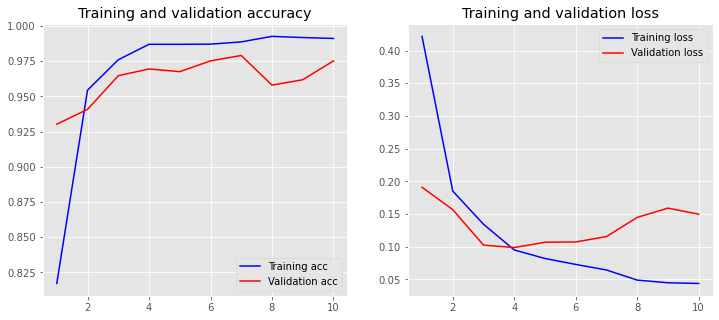

In [76]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)